In [2]:
# Inporting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading and exploring the dataset

In [3]:
# Loading and exploring data
raw_data=pd.read_csv('posts_data.csv')
raw_data.head()

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
0,reuters,Reuters,Reuters Editorial,Portuguese drama 'A Herdade' chronicles one la...,A landowner must learn to adapt to changes swe...,https://www.reuters.com/article/us-filmfestiva...,https://s4.reutersmedia.net/resources_v2/image...,2019-09-05T15:37:20Z,"VENICE, Italy (Reuters) - A landowner must lea...",0.0,0.0,0.0,0.0,0.0
1,abc-news,ABC News,The Associated Press,Queer style kicks off NY Fashion Week with inc...,In celebration of gender-fluid fashion and inc...,https://abcnews.go.com/Entertainment/wireStory...,https://s.abcnews.com/images/Lifestyle/WireAP_...,2019-09-06T15:27:54Z,In celebration of gender-fluid fashion and inc...,0.0,0.0,0.0,0.0,0.0
2,the-irish-times,The Irish Times,Charlie Taylor,Huckletree to open fintech-focused co-working ...,Co-working space provider co-founded by Irishm...,https://www.irishtimes.com/business/technology...,https://www.irishtimes.com/polopoly_fs/1.40237...,2019-09-19T12:00:38Z,"Huckletree, a pan-European co-working space pr...",0.0,0.0,0.0,0.0,0.0
3,the-new-york-times,The New York Times,Abby Goodnough,Pelosi’s Drug Plan Would Let U.S. Negotiate Pr...,Speaker Nancy Pelosi unveils her bill to fight...,https://www.nytimes.com/2019/09/19/us/politics...,https://static01.nyt.com/images/2019/09/19/wor...,2019-09-19T13:00:04Z,"Most notably, the bill would require drug comp...",0.0,622.0,147.0,149.0,0.0
4,bbc-news,BBC News,NaN,Rugby World Cup: Anthony Watson says England w...,England back Anthony Watson says England will ...,https://www.bbc.co.uk/sport/rugby-union/49598207,https://ichef.bbci.co.uk/onesport/cps/624/cpsp...,2019-09-05T15:36:38Z,Anthony Watson did not play for England for ov...,0.0,0.0,0.0,2.0,0.0


In [4]:
# Checking missing data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   source_id              10437 non-null  object 
 1   source_name            10437 non-null  object 
 2   author                 9417 non-null   object 
 3   title                  10435 non-null  object 
 4   description            10413 non-null  object 
 5   url                    10436 non-null  object 
 6   url_to_image           9781 non-null   object 
 7   published_at           10436 non-null  object 
 8   content                9145 non-null   object 
 9   is_top                 10435 non-null  float64
 10  total_reactions        10319 non-null  float64
 11  total_comments         10319 non-null  float64
 12  total_shares           10319 non-null  float64
 13  total_plugin_comments  10319 non-null  float64
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [5]:
# calculating % of missing numerical data
(10437-10319)/10437*100

1.1305930823033439

In [6]:
# Looking at data
raw_data.describe(include='all')

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
count,10437,10437,9417,10435,10413,10436,9781,10436,9145,10435.000000,10319.000000,10319.000000,10319.000000,10319.000000
unique,13,13,2580,9810,9173,10433,8363,9441,8385,NaN,NaN,NaN,NaN,NaN
top,reuters,Reuters,The Associated Press,Quickly catch up on the day's news,"Get breaking national and world news, broadcas...",https://www.cbsnews.com/news/9-11-memorial-cer...,https://s4.reutersmedia.net/resources_v2/image...,2019-09-07T05:00:00Z,Chat with us in Facebook Messenger. Find out w...,NaN,NaN,NaN,NaN,NaN
freq,1252,1252,975,6,408,2,379,25,125,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.122089,381.395290,124.032949,196.236263,0.011629
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.327404,4433.344792,965.351188,1020.680229,0.268276
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,8.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,43.000000,12.000000,47.500000,0.000000


In [7]:
raw_data['source_id'].unique()

array(['reuters', 'abc-news', 'the-irish-times', 'the-new-york-times',
       'bbc-news', 'cbs-news', 'business-insider', 'al-jazeera-english',
       'the-wall-street-journal', 'cnn', 'newsweek', 'espn', '1'],
      dtype=object)

In [10]:
# Checking source id == 1
# Loks like this is a numerical data "is_top":"total_plugin_comments"
# Categorical info "source_i"d:"concept" is lacking. Ask a client about these values 
raw_data.query("source_id=='1'")

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
8872,1,460.0,151.0,352.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Drop the skewed raw from the above from the analysis
data=raw_data.copy()
data=data.drop(index=8872,axis=0)
data.query("source_id=='1'")

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,is_top,total_reactions,total_comments,total_shares,total_plugin_comments


In [12]:
# Working with clean data
data.describe(include='all')

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
count,10436,10436,9416,10434,10412,10436,9781,10436,9145,10435.000000,10319.000000,10319.000000,10319.000000,10319.000000
unique,12,12,2579,9809,9172,10433,8363,9441,8385,NaN,NaN,NaN,NaN,NaN
top,reuters,Reuters,The Associated Press,Quickly catch up on the day's news,"Get breaking national and world news, broadcas...",https://www.cbsnews.com/news/9-11-memorial-cer...,https://s4.reutersmedia.net/resources_v2/image...,2019-09-07T05:00:00Z,Chat with us in Facebook Messenger. Find out w...,NaN,NaN,NaN,NaN,NaN
freq,1252,1252,975,6,408,2,379,25,125,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.122089,381.395290,124.032949,196.236263,0.011629
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.327404,4433.344792,965.351188,1020.680229,0.268276
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,8.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,43.000000,12.000000,47.500000,0.000000


In [131]:
data.query("total_reactions==354132.0")

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
1521,cnn,CNN,Elizabeth Wolfe And Brian Ries,"Jimmy Carter, the oldest living former U.S. pr...","Jimmy Carter, the oldest living former U.S. pr...",https://www.cnn.com/2019/10/01/us/jimmy-carter...,https://cdn.cnn.com/cnnnext/dam/assets/1909241...,2019-10-01T10:40:23Z,NaN,0.0,354132.0,41293.0,39422.0,8.0


In [133]:
data.query("total_comments==48490.0")

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
6210,bbc-news,BBC News,BBC News,Zimbabwe ex-President Robert Mugabe dies aged 95,"Robert Mugabe, Zimbabwe's first post-independe...",http://www.bbc.co.uk/news/world-africa-49604152,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-06T05:04:07Z,"Robert Mugabe, Zimbabwe's first post-independe...",1.0,125106.0,48490.0,32921.0,0.0


In [134]:
data.query("total_shares==39422.0")

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
1521,cnn,CNN,Elizabeth Wolfe And Brian Ries,"Jimmy Carter, the oldest living former U.S. pr...","Jimmy Carter, the oldest living former U.S. pr...",https://www.cnn.com/2019/10/01/us/jimmy-carter...,https://cdn.cnn.com/cnnnext/dam/assets/1909241...,2019-10-01T10:40:23Z,NaN,0.0,354132.0,41293.0,39422.0,8.0


In [135]:
data.query("total_plugin_comments==15.0")

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
9386,business-insider,Business Insider,Hayley Peterson,Walmart will ban shoppers from openly carrying...,Walmart on Tuesday announced changes to its gu...,https://www.businessinsider.com/walmart-bans-o...,https://amp.businessinsider.com/images/5d5ce5b...,2019-09-03T17:00:00Z,Walmart is banning shoppers from openly carryi...,1.0,49024.0,22147.0,13453.0,15.0


In [279]:
# top cbs-news
len(data.query("source_id=='cbs-news'&is_top==1"))

139

In [273]:
# relative top posts the-wall-street-journal
len(data.query("source_id=='the-wall-street-journal'&is_top==1"))/len(data.query("source_id=='the-wall-street-journal'"))*100

38.43843843843844

## Plotting data

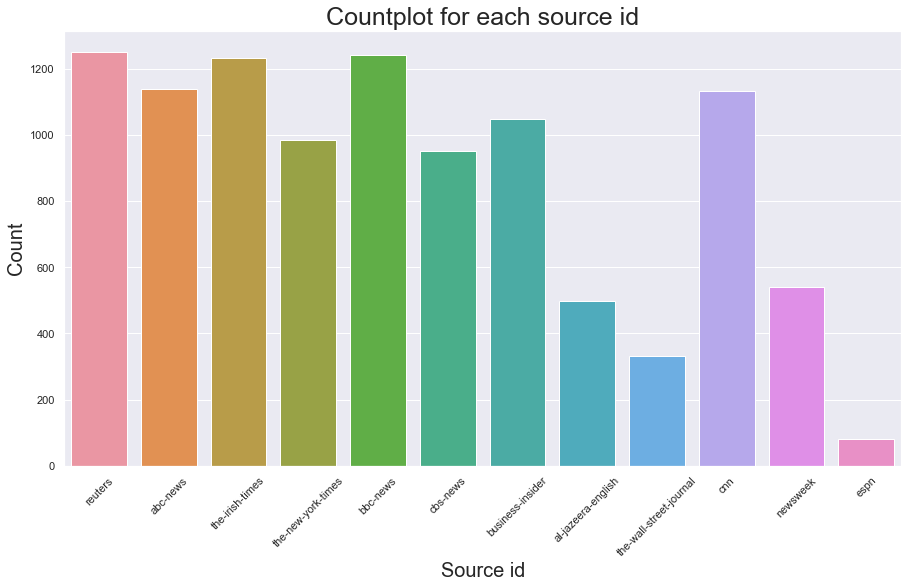

In [78]:
# Plotting source id data
plt.figure(figsize = (15,8))
ax = sns.countplot(data = data, x = 'source_id')
plt.xlabel('Source id',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.title('Countplot for each source id',fontsize=25)
plt.show()

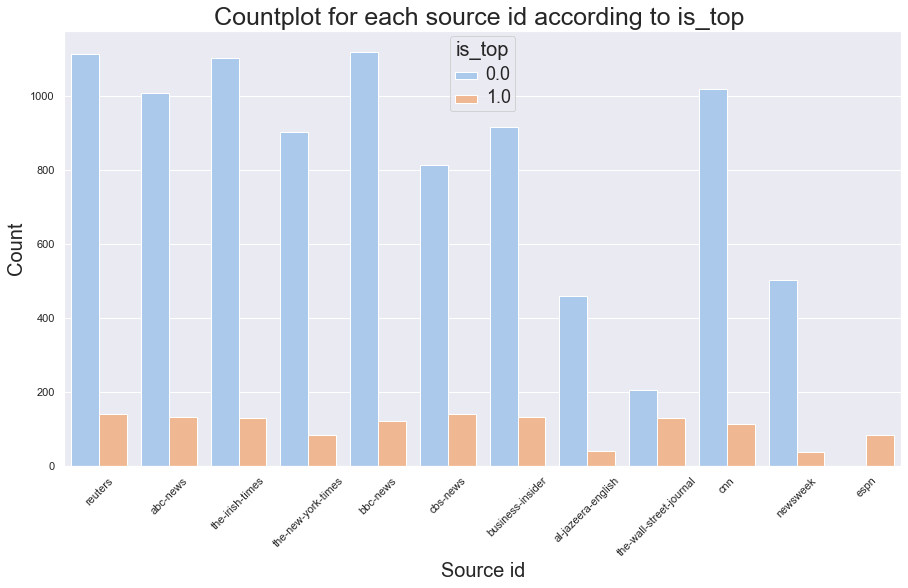

In [79]:
# Plotting source id data according to is_top
plt.figure(figsize = (15,8))
ax = sns.countplot(data = data, x = 'source_id',hue='is_top',palette='pastel')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.xlabel('Source id',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Countplot for each source id according to is_top ',fontsize=25)
plt.xticks(rotation=45)
plt.show()

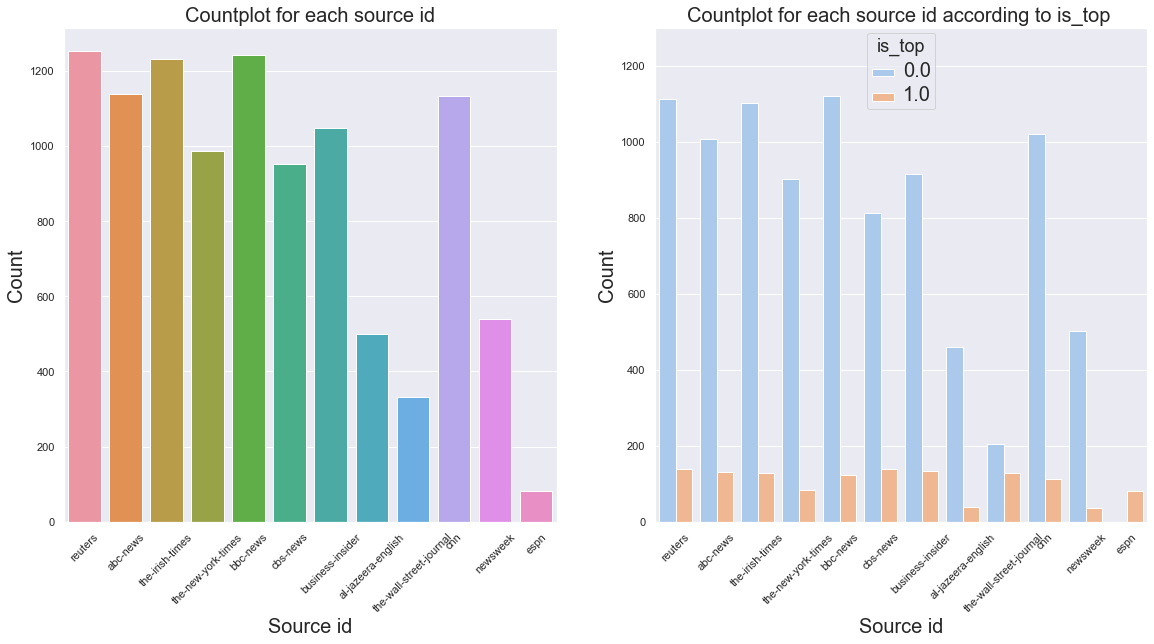

In [97]:
# Combining two countplots
fig = plt.figure(figsize = (30,20))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = data, x = 'source_id')
plt.xlabel('Source id',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.title('Countplot for each source id',fontsize=20)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = data, x = 'source_id',hue='is_top',palette='pastel')
plt.setp(ax2.get_legend().get_texts(), fontsize='20')
plt.setp(ax2.get_legend().get_title(), fontsize='18')
plt.xlabel('Source id',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.ylim(0,1300)
plt.title('Countplot for each source id according to is_top ',fontsize=20)
plt.xticks(rotation=45)
plt.show()

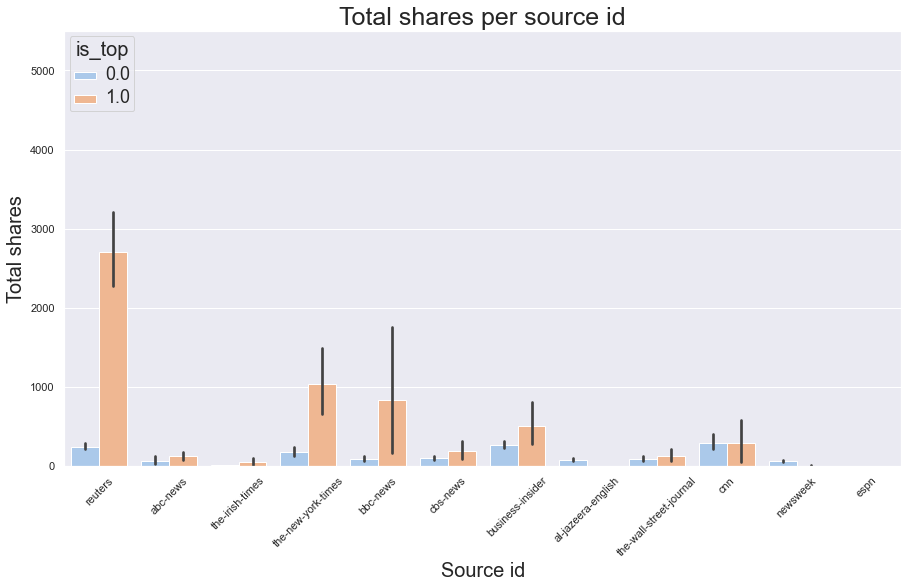

In [98]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data = data, x = 'source_id',y='total_shares',hue='is_top',palette='pastel')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.xlabel('Source id',fontsize=20)
plt.ylabel('Total shares',fontsize=20)
plt.title('Total shares per source id',fontsize=25)
plt.ylim(0,5500)
plt.xticks(rotation=45)
plt.show()

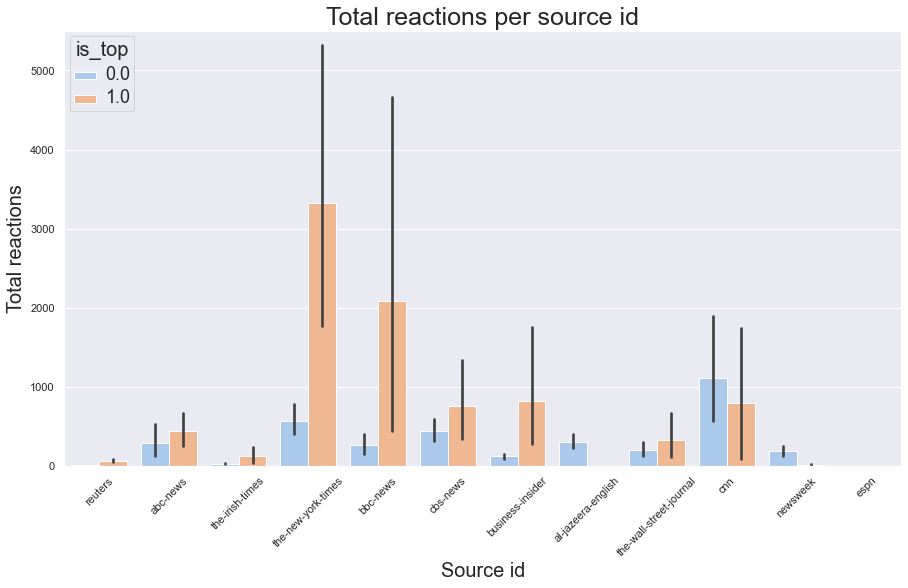

In [99]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data = data, x = 'source_id',y='total_reactions',hue='is_top',palette='pastel')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.xlabel('Source id',fontsize=20)
plt.ylabel('Total reactions',fontsize=20)
plt.ylim(0,5500)
plt.title('Total reactions per source id',fontsize=25)
plt.xticks(rotation=45)
plt.show()

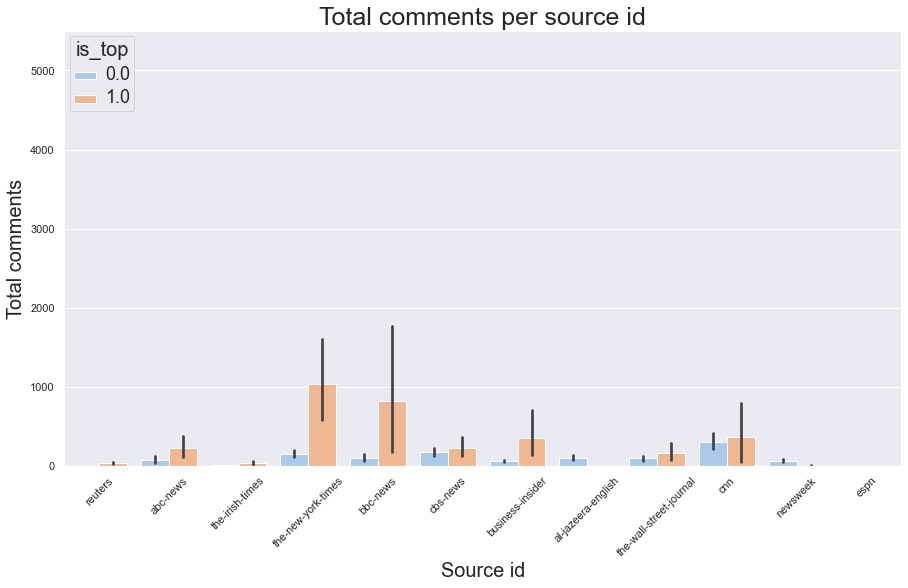

In [100]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data = data, x = 'source_id',y='total_comments',hue='is_top',palette='pastel')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.xlabel('Source id',fontsize=20)
plt.ylabel('Total comments',fontsize=20)
plt.ylim(0,5500)
plt.title('Total comments per source id',fontsize=25)
plt.xticks(rotation=45)
plt.show()

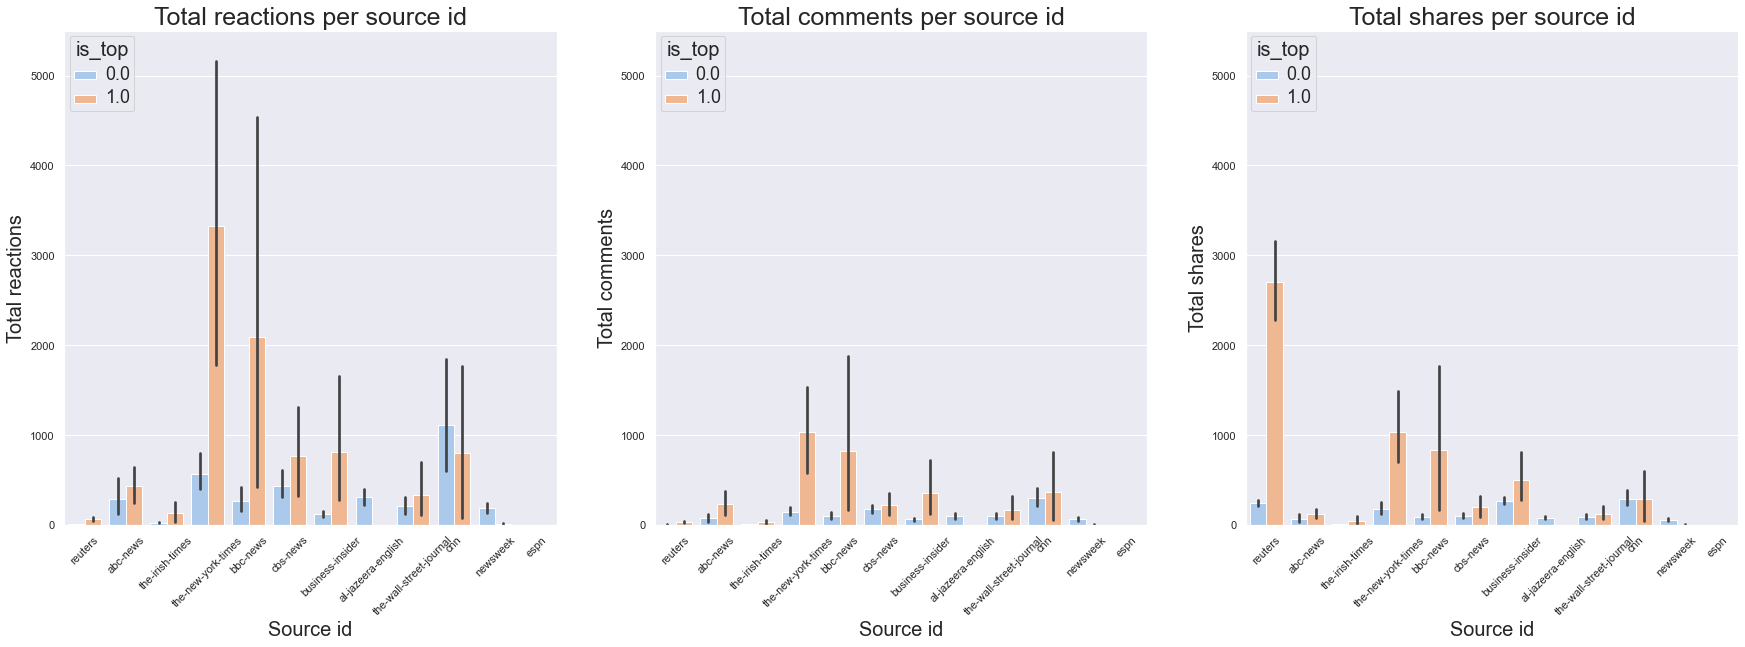

In [112]:
# Combining three barplots
fig = plt.figure(figsize = (30,20))

ax1 = fig.add_subplot(2,3,1)
sns.barplot(data = data, x = 'source_id',y='total_reactions',hue='is_top',palette='pastel')
plt.ylim(0,5500)
plt.setp(ax1.get_legend().get_texts(), fontsize='18')
plt.setp(ax1.get_legend().get_title(), fontsize='20')
plt.xlabel('Source id',fontsize=20)
plt.ylabel('Total reactions',fontsize=20)
plt.title('Total reactions per source id',fontsize=25)
plt.xticks(rotation=45)

ax2 = fig.add_subplot(2,3,2)
sns.barplot(data = data, x = 'source_id',y='total_comments',hue='is_top',palette='pastel')
plt.ylim(0,5500)
plt.setp(ax2.get_legend().get_texts(), fontsize='18')
plt.setp(ax2.get_legend().get_title(), fontsize='20')
plt.xlabel('Source id',fontsize=20)
plt.ylabel('Total comments',fontsize=20)
plt.title('Total comments per source id',fontsize=25)
plt.xticks(rotation=45)

ax3 = fig.add_subplot(2,3,3)
sns.barplot(data = data, x = 'source_id',y='total_shares',hue='is_top',palette='pastel')
plt.ylim(0,5500)
plt.setp(ax3.get_legend().get_texts(), fontsize='18')
plt.setp(ax3.get_legend().get_title(), fontsize='20')
plt.xlabel('Source id',fontsize=20)
plt.ylabel('Total shares',fontsize=20)
plt.title('Total shares per source id',fontsize=25)
plt.xticks(rotation=45)

plt.show()

In [11]:
# Checking duplicated url
url_check=data[data.duplicated(['url'])]['url']
data[data['url'].isin(url_check)]

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
2990,cbs-news,CBS News,CBS News,"Lil Nas X on his journey to ""Old Town Road""",The 20-year-old made history when “Old Town Ro...,https://www.cbsnews.com/video/lil-nas-x-on-his...,https://cbsnews3.cbsistatic.com/hub/i/r/2019/1...,2019-10-03T17:35:36+00:00,The 20-year-old made history when “Old Town Ro...,1.0,155.0,18.0,23.0,0.0
4775,cbs-news,CBS News,CBS News,"Lil Nas X on his journey to ""Old Town Road""",The 20-year-old made history when “Old Town Ro...,https://www.cbsnews.com/video/lil-nas-x-on-his...,https://cbsnews3.cbsistatic.com/hub/i/r/2019/1...,2019-10-01T12:35:30Z,NaN,0.0,0.0,0.0,3.0,0.0
7074,al-jazeera-english,Al Jazeera English,NaN,Open-source framework for publishing content,"We dialled more than 35,000 random phone numbe...",https://interactive.aljazeera.com/aje/2019/sou...,https://interactive.aljazeera.com/aje/2019/sou...,2019-09-12T12:02:41Z,"Last September, at a meeting in Addis Ababa, P...",1.0,2.0,3.0,7.0,0.0
7362,cbs-news,CBS News,CBS News,New York to commemorate 18th anniversary of Se...,"On Wednesday, the 9/11 Memorial and Museum wil...",https://www.cbsnews.com/news/9-11-memorial-cer...,https://cbsnews3.cbsistatic.com/hub/i/r/2019/0...,2019-09-09T01:15:19Z,It's been 18 years since the September 11 atta...,0.0,36.0,3.0,25.0,0.0
9196,cbs-news,CBS News,CBS News,9/11 Memorial: New York to commemorate 18th an...,"On Wednesday, the 9/11 Memorial and Museum wil...",https://www.cbsnews.com/news/9-11-memorial-cer...,https://cbsnews3.cbsistatic.com/hub/i/r/2019/0...,2019-09-10T17:44:47+00:00,It's been 18 years since the September 11 atta...,1.0,468.0,66.0,200.0,0.0
10169,al-jazeera-english,Al Jazeera English,NaN,"It's estimated that more than 383,000 people h...","It's estimated that more than 383,000 people h...",https://interactive.aljazeera.com/aje/2019/sou...,https://interactive.aljazeera.com/aje/2019/sou...,2019-10-03T16:39:00Z,"Last September, at a meeting in Addis Ababa, P...",0.0,273.0,29.0,181.0,0.0


## Analysing numerical data

In [114]:
# Removing empty numerical rows, because there is 1.13% null numerical data
data_no_missing=raw_data.copy()
data_no_missing=data_no_missing.query('total_reactions.notnull() & total_comments.notnull() & total_shares.notnull() & total_plugin_comments.notnull()', engine='python')
data_no_missing.head()

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
0,reuters,Reuters,Reuters Editorial,Portuguese drama 'A Herdade' chronicles one la...,A landowner must learn to adapt to changes swe...,https://www.reuters.com/article/us-filmfestiva...,https://s4.reutersmedia.net/resources_v2/image...,2019-09-05T15:37:20Z,"VENICE, Italy (Reuters) - A landowner must lea...",0.0,0.0,0.0,0.0,0.0
1,abc-news,ABC News,The Associated Press,Queer style kicks off NY Fashion Week with inc...,In celebration of gender-fluid fashion and inc...,https://abcnews.go.com/Entertainment/wireStory...,https://s.abcnews.com/images/Lifestyle/WireAP_...,2019-09-06T15:27:54Z,In celebration of gender-fluid fashion and inc...,0.0,0.0,0.0,0.0,0.0
2,the-irish-times,The Irish Times,Charlie Taylor,Huckletree to open fintech-focused co-working ...,Co-working space provider co-founded by Irishm...,https://www.irishtimes.com/business/technology...,https://www.irishtimes.com/polopoly_fs/1.40237...,2019-09-19T12:00:38Z,"Huckletree, a pan-European co-working space pr...",0.0,0.0,0.0,0.0,0.0
3,the-new-york-times,The New York Times,Abby Goodnough,Pelosi’s Drug Plan Would Let U.S. Negotiate Pr...,Speaker Nancy Pelosi unveils her bill to fight...,https://www.nytimes.com/2019/09/19/us/politics...,https://static01.nyt.com/images/2019/09/19/wor...,2019-09-19T13:00:04Z,"Most notably, the bill would require drug comp...",0.0,622.0,147.0,149.0,0.0
4,bbc-news,BBC News,NaN,Rugby World Cup: Anthony Watson says England w...,England back Anthony Watson says England will ...,https://www.bbc.co.uk/sport/rugby-union/49598207,https://ichef.bbci.co.uk/onesport/cps/624/cpsp...,2019-09-05T15:36:38Z,Anthony Watson did not play for England for ov...,0.0,0.0,0.0,2.0,0.0


In [115]:
# looking closer at no missing data
data_no_missing.describe()

,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
count,10319.000000,10319.000000,10319.000000,10319.000000,10319.000000
mean,0.112220,381.395290,124.032949,196.236263,0.011629
std,0.315652,4433.344792,965.351188,1020.680229,0.268276
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,8.000000,0.000000
75%,0.000000,43.000000,12.000000,47.500000,0.000000
max,1.000000,354132.000000,48490.000000,39422.000000,15.000000


In [117]:
# Creating a dataframe with only numerical values
num_pd=data_no_missing.select_dtypes(include = ['float64', 'int64'])
num_pd.head()

,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,622.0,147.0,149.0,0.0
4,0.0,0.0,0.0,2.0,0.0


In [118]:
# Spliting dataset into top & not top
top=num_pd.query("is_top=='1'")
top

,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
9,1.0,148.0,35.0,133.0,0.0
19,1.0,20.0,19.0,4043.0,0.0
23,1.0,0.0,0.0,1.0,0.0
27,1.0,0.0,0.0,0.0,0.0
30,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
10388,1.0,9889.0,1317.0,4011.0,0.0
10397,1.0,1.0,1.0,1885.0,0.0
10398,1.0,0.0,0.0,0.0,0.0
10426,1.0,48.0,4.0,13.0,0.0


In [119]:
# Spliting dataset into top & not top
not_top=num_pd.query("is_top=='0'")
not_top

,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,622.0,147.0,149.0,0.0
4,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...
10431,0.0,0.0,0.0,738.0,0.0
10433,0.0,2.0,2.0,5.0,0.0
10434,0.0,0.0,0.0,47.0,0.0
10435,0.0,0.0,0.0,10.0,0.0


In [120]:
# checking whether all rows were included. Yes
9161+1158

10319

In [121]:
# Looking at top==1 data
top.describe()

,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
count,1158.0,1158.000000,1158.000000,1158.000000,1158.000000
mean,1.0,815.392919,311.184801,622.247841,0.022453
std,0.0,5276.580051,2012.291887,2161.456503,0.458678
min,1.0,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.000000,10.000000,0.000000
75%,1.0,81.500000,27.000000,218.750000,0.000000
max,1.0,125106.000000,48490.000000,36720.000000,15.000000


In [123]:
top.sort_values(by='total_reactions',ascending=False)

,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
6210,1.0,125106.0,48490.0,32921.0,0.0
9524,1.0,50466.0,8574.0,8773.0,0.0
9386,1.0,49024.0,22147.0,13453.0,15.0
1664,1.0,41951.0,13287.0,10891.0,0.0
8141,1.0,41499.0,19687.0,12581.0,1.0
...,...,...,...,...,...
5831,1.0,0.0,0.0,0.0,0.0
5833,1.0,0.0,0.0,0.0,0.0
5845,1.0,0.0,0.0,0.0,0.0
5857,1.0,0.0,0.0,823.0,0.0


In [141]:
# Createing a df with max reactions,shares,commnets & plugin comments of top df
max_top=data.query("total_reactions==125106.000000|total_comments==48490.000000|total_shares==36720.000000|total_plugin_comments==15.000000")
max_top

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
5001,bbc-news,BBC News,BBC News,MPs return ahead of key Brexit vote,Latest reaction as Prime Minister Boris Johnso...,http://www.bbc.co.uk/news/live/uk-politics-495...,//m.files.bbci.co.uk/modules/bbc-morph-news-wa...,2019-09-03T14:53:39.3996878Z,"The defection of Phillip Lee, MP for Bracknell...",1.0,34137.0,15261.0,36720.0,0.0
6210,bbc-news,BBC News,BBC News,Zimbabwe ex-President Robert Mugabe dies aged 95,"Robert Mugabe, Zimbabwe's first post-independe...",http://www.bbc.co.uk/news/world-africa-49604152,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-06T05:04:07Z,"Robert Mugabe, Zimbabwe's first post-independe...",1.0,125106.0,48490.0,32921.0,0.0
9386,business-insider,Business Insider,Hayley Peterson,Walmart will ban shoppers from openly carrying...,Walmart on Tuesday announced changes to its gu...,https://www.businessinsider.com/walmart-bans-o...,https://amp.businessinsider.com/images/5d5ce5b...,2019-09-03T17:00:00Z,Walmart is banning shoppers from openly carryi...,1.0,49024.0,22147.0,13453.0,15.0


In [152]:
# changing the previous df into a presentation table
table1=max_top.copy()
table1=table1.drop(["url","url_to_image","source_id"],axis=1)
table1=table1.rename(columns={"total_reactions": "reactions", "total_comments": "comments","total_shares":"shares","total_plugin_comments":"plugin_comments"})
table1

,source_name,author,title,description,published_at,content,is_top,reactions,comments,shares,plugin_comments
5001,BBC News,BBC News,MPs return ahead of key Brexit vote,Latest reaction as Prime Minister Boris Johnso...,2019-09-03T14:53:39.3996878Z,"The defection of Phillip Lee, MP for Bracknell...",1.0,34137.0,15261.0,36720.0,0.0
6210,BBC News,BBC News,Zimbabwe ex-President Robert Mugabe dies aged 95,"Robert Mugabe, Zimbabwe's first post-independe...",2019-09-06T05:04:07Z,"Robert Mugabe, Zimbabwe's first post-independe...",1.0,125106.0,48490.0,32921.0,0.0
9386,Business Insider,Hayley Peterson,Walmart will ban shoppers from openly carrying...,Walmart on Tuesday announced changes to its gu...,2019-09-03T17:00:00Z,Walmart is banning shoppers from openly carryi...,1.0,49024.0,22147.0,13453.0,15.0


In [122]:
# looking at not top data
not_top.describe()

,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
count,9161.0,9161.000000,9161.000000,9161.000000,9161.000000
mean,0.0,326.535640,100.375941,142.386093,0.010261
std,0.0,4312.270293,730.243853,746.685707,0.233409
min,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,1.000000,0.000000
50%,0.0,1.000000,0.000000,8.000000,0.000000
75%,0.0,39.000000,11.000000,44.000000,0.000000
max,0.0,354132.000000,41293.000000,39422.000000,14.000000


In [142]:
# Createing a df with max reactions,shares,commnets & plugin comments of not top df
max_not_top=data.query("total_reactions==354132.000000|total_comments==41293.000000|total_shares==39422.000000|total_plugin_comments==14.000000")
max_not_top

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
1521,cnn,CNN,Elizabeth Wolfe And Brian Ries,"Jimmy Carter, the oldest living former U.S. pr...","Jimmy Carter, the oldest living former U.S. pr...",https://www.cnn.com/2019/10/01/us/jimmy-carter...,https://cdn.cnn.com/cnnnext/dam/assets/1909241...,2019-10-01T10:40:23Z,NaN,0.0,354132.0,41293.0,39422.0,8.0
5875,business-insider,Business Insider,Jack Derwin,Elon Musk just discovered that Chad and Romani...,Elon Musk inadvertently turned up one of life'...,https://www.businessinsider.com/elon-musks-twe...,https://amp.businessinsider.com/images/5d75d8d...,2019-09-09T06:32:53Z,Chad and Romania are two countries that rarely...,0.0,1438.0,381.0,392.0,14.0


In [154]:
# changing the previous df into a presentation table
table2=max_not_top.copy()
table2=table2.drop(["url","url_to_image","source_id"],axis=1)
table2=table2.rename(columns={"total_reactions": "reactions", "total_comments": "comments","total_shares":"shares","total_plugin_comments":"plugin_comments"})
table2

,source_name,author,title,description,published_at,content,is_top,reactions,comments,shares,plugin_comments
1521,CNN,Elizabeth Wolfe And Brian Ries,"Jimmy Carter, the oldest living former U.S. pr...","Jimmy Carter, the oldest living former U.S. pr...",2019-10-01T10:40:23Z,NaN,0.0,354132.0,41293.0,39422.0,8.0
5875,Business Insider,Jack Derwin,Elon Musk just discovered that Chad and Romani...,Elon Musk inadvertently turned up one of life'...,2019-09-09T06:32:53Z,Chad and Romania are two countries that rarely...,0.0,1438.0,381.0,392.0,14.0


In [145]:
# Exploring posts woth plugin comments (only 50 out of 10436 posts)
plugin=data.query("total_plugin_comments>0")
plugin.describe(include="all")

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,is_top,total_reactions,total_comments,total_shares,total_plugin_comments
count,50,50,50,50,50,50,50,50,39,50.000000,50.000000,50.000000,50.000000,50.000000
unique,4,4,42,50,50,50,50,50,39,NaN,NaN,NaN,NaN,NaN
top,business-insider,Business Insider,Al Jazeera,Bernie Sanders wants to get rid of medical deb...,A massive storm surge in the Bahamas killed ab...,https://www.cnn.com/2019/10/02/us/iyw-boy-toy-...,https://image.businessinsider.com/5d9350d62e22...,2019-09-09T07:40:31Z,At least 30 civilians were killed and 40 injur...,NaN,NaN,NaN,NaN,NaN
freq,22,22,4,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.180000,14146.520000,3291.100000,2808.020000,2.400000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.388088,50850.597151,7104.945051,6451.236532,3.050594
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,111.000000,22.000000,30.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,737.500000,361.500000,241.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2388.000000,994.500000,551.500000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,7014.000000,1973.500000,1654.000000,2.000000


In [146]:
plugin['source_id'].unique()

array(['business-insider', 'al-jazeera-english', 'cnn', 'abc-news'],
      dtype=object)

## Plotting numerical data

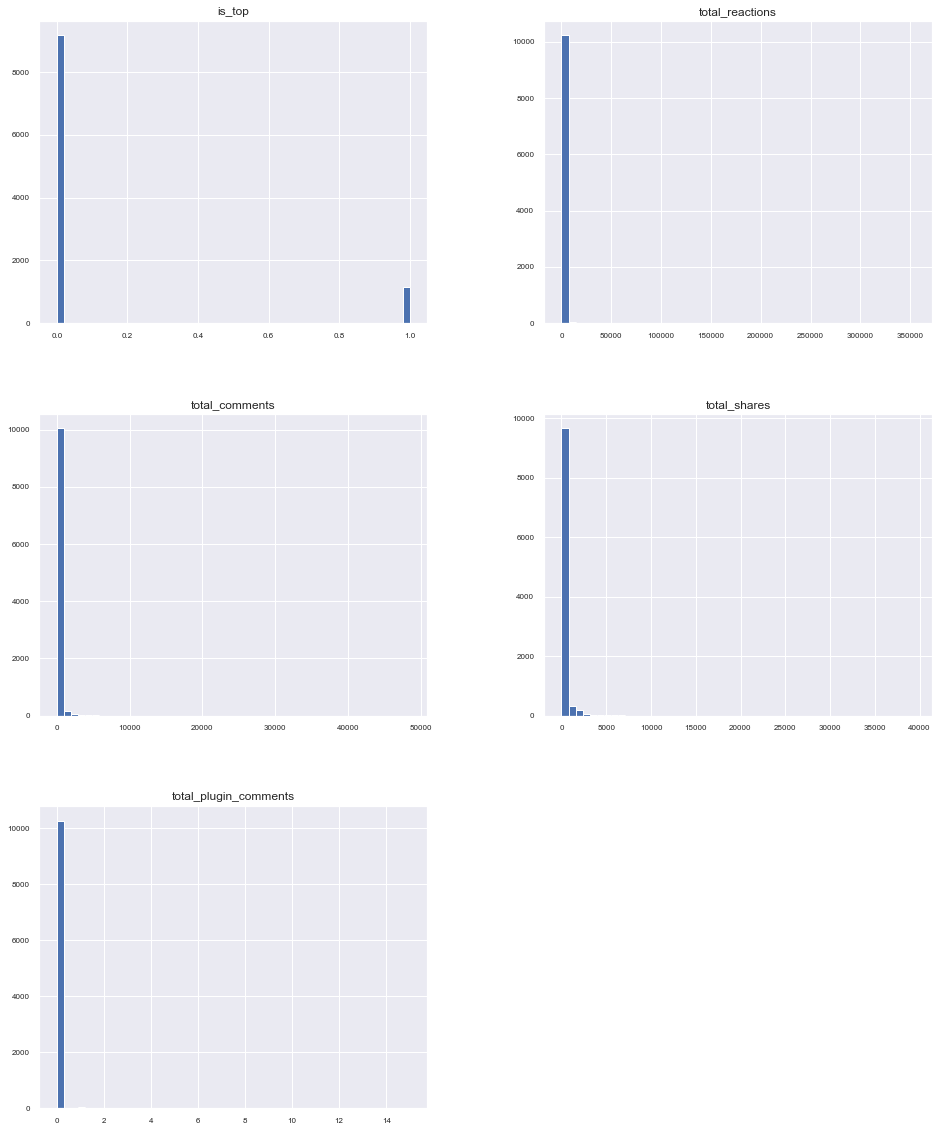

In [155]:
# all numerical data
num_pd.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

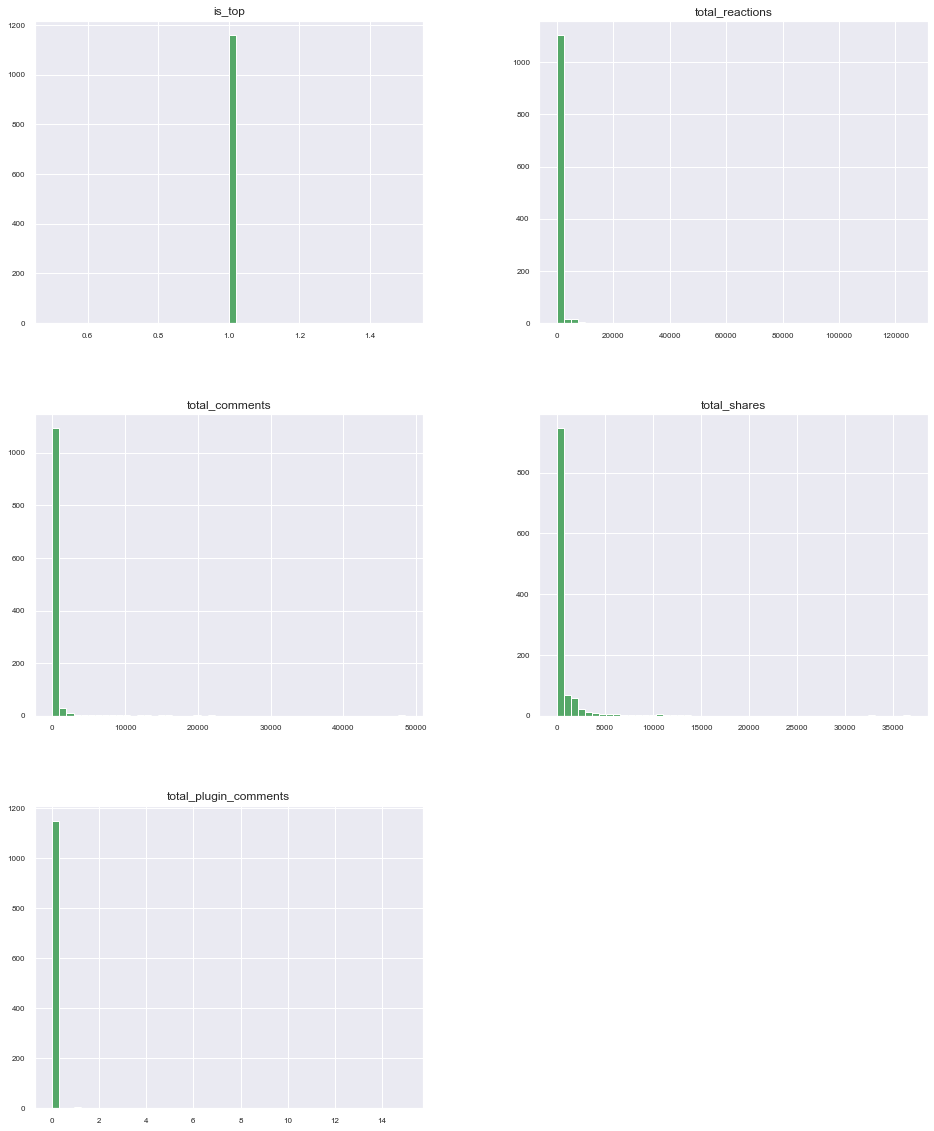

In [156]:
# top (is_top==1) numerical data
top.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8,color='g');

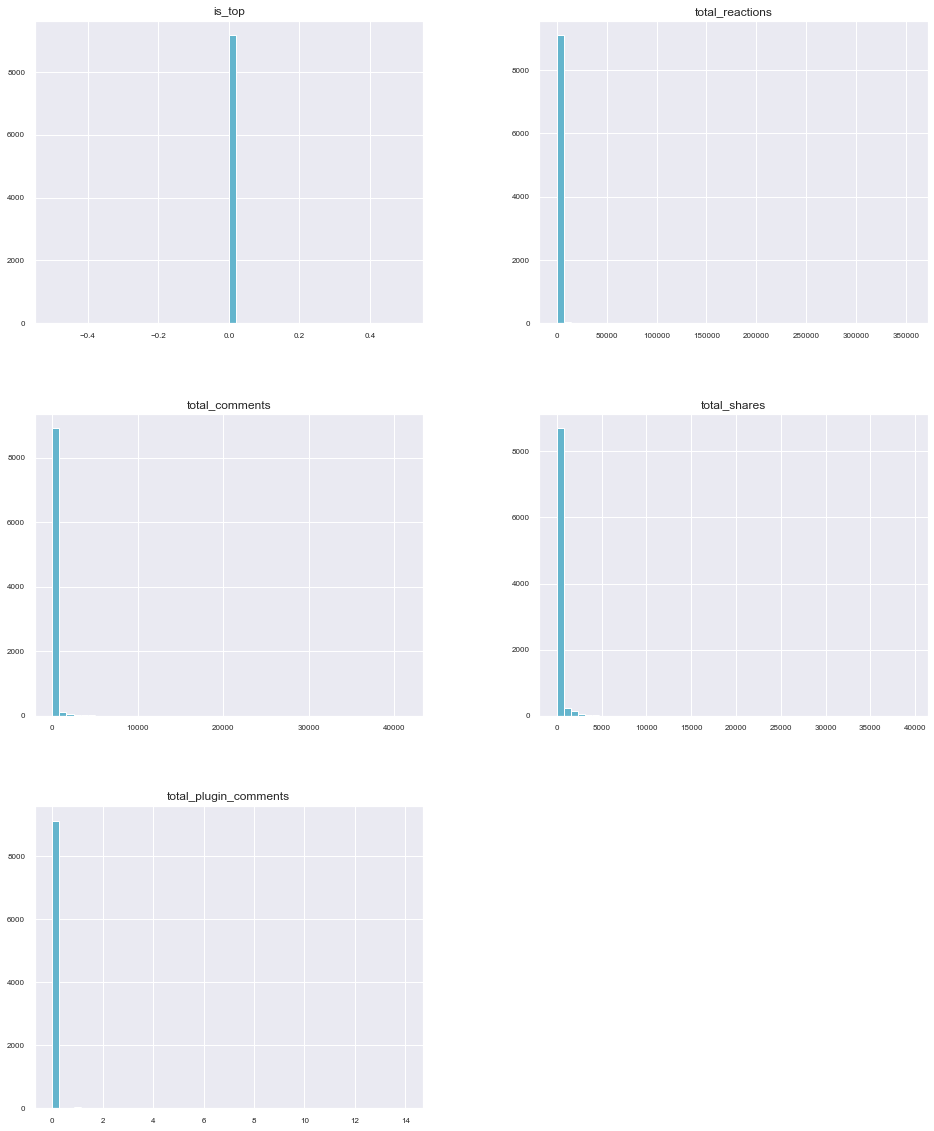

In [157]:
# not top (is_top==0) numerical data
not_top.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8,color='c');

## Correlation

In [158]:
# Correlations 'total shares'
shares_corr = num_pd.corr()['total_shares'][[x for i,x in enumerate(num_pd) if i!=3]]
shares_corr

is_top                   0.148401
total_reactions          0.712733
total_comments           0.754289
total_plugin_comments    0.224588
Name: total_shares, dtype: float64

In [159]:
# Correlations 'total comments'
comments_corr = num_pd.corr()['total_comments'][[x for i,x in enumerate(num_pd) if i!=2]]
comments_corr

is_top                   0.068931
total_reactions          0.818858
total_shares             0.754289
total_plugin_comments    0.309214
Name: total_comments, dtype: float64

In [160]:
# Correlations 'total reactions'
reactions_corr = num_pd.corr()['total_reactions'][[x for i,x in enumerate(num_pd) if i!=1]]
reactions_corr

is_top                   0.034806
total_comments           0.818858
total_shares             0.712733
total_plugin_comments    0.329211
Name: total_reactions, dtype: float64

## Plotting numerical data with high correlation scores

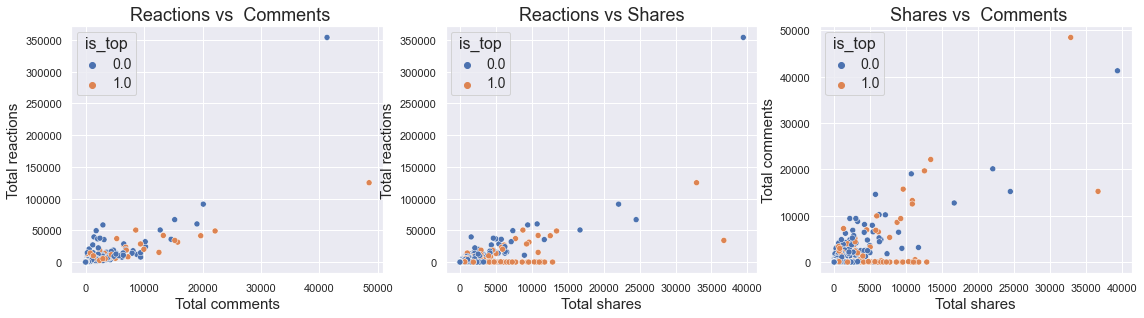

In [199]:
# Scatterplots
fig=plt.figure(figsize = (19,10))
ax1 = fig.add_subplot(2,3,1)
sns.scatterplot(x=num_pd['total_comments'],y=num_pd['total_reactions'],hue=num_pd['is_top'])
plt.setp(ax1.get_legend().get_texts(), fontsize='14')
plt.setp(ax1.get_legend().get_title(), fontsize='16')
plt.ylabel('Total reactions',fontsize=15)
plt.xlabel('Total comments',fontsize=15)
plt.title(' Reactions vs  Comments',fontsize=18)

ax2 = fig.add_subplot(2,3,2)
sns.scatterplot(x=num_pd['total_shares'],y=num_pd['total_reactions'],hue=num_pd['is_top'])
plt.setp(ax2.get_legend().get_texts(), fontsize='14')
plt.setp(ax2.get_legend().get_title(), fontsize='16')
plt.ylabel('Total reactions',fontsize=15)
plt.xlabel('Total shares',fontsize=15)
plt.title('Reactions vs Shares',fontsize=18)

ax3 = fig.add_subplot(2,3,3)
sns.scatterplot(x=num_pd['total_shares'],y=num_pd['total_comments'],hue=num_pd['is_top'])
plt.setp(ax3.get_legend().get_texts(), fontsize='14')
plt.setp(ax3.get_legend().get_title(), fontsize='16')
plt.ylabel('Total comments',fontsize=15)
plt.xlabel('Total shares',fontsize=15)
plt.title(' Shares vs  Comments',fontsize=18)

plt.show()

(0.0, 40000.0)

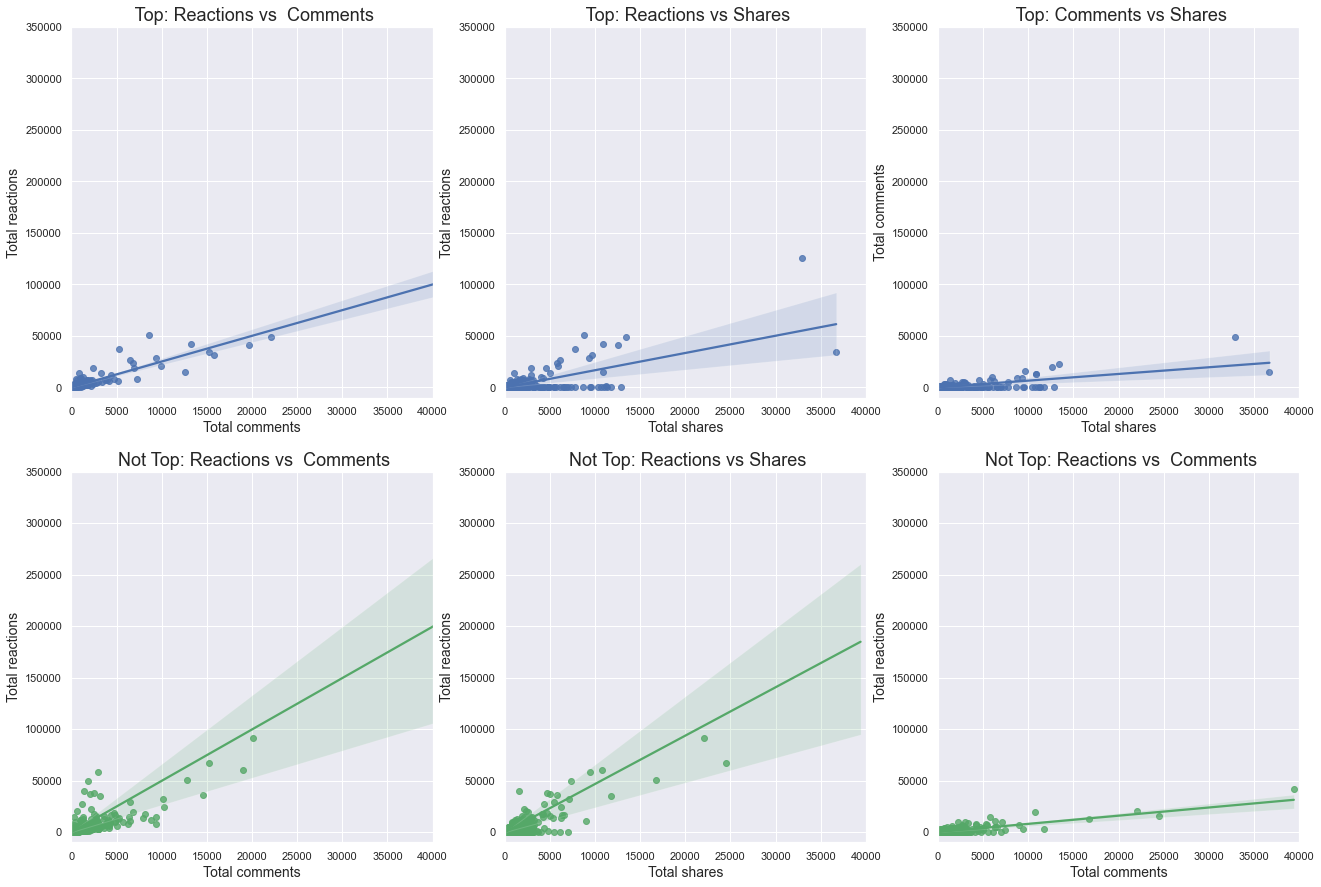

In [287]:
# Plotting data and a linear regression model fit with sns.regplot
fig=plt.figure(figsize = (22,15))
ax1 = fig.add_subplot(2,3,1)
sns.regplot(x=top['total_comments'],y=top['total_reactions'],color="b")
plt.ylabel('Total reactions',fontsize=14)
plt.xlabel('Total comments',fontsize=14)
plt.title(' Top: Reactions vs  Comments',fontsize=18)
plt.ylim(-10000,350000)
plt.xlim(0,40000)

ax2 = fig.add_subplot(2,3,2)
sns.regplot(x=top['total_shares'],y=top['total_reactions'],color="b")
plt.ylabel('Total reactions',fontsize=14)
plt.xlabel('Total shares',fontsize=14)
plt.title(' Top: Reactions vs Shares',fontsize=18)
plt.ylim(-10000,350000)
plt.xlim(0,40000)

ax3 = fig.add_subplot(2,3,3)
sns.regplot(x=top['total_shares'],y=top['total_comments'],color="b")
plt.ylabel('Total comments',fontsize=14)
plt.xlabel('Total shares',fontsize=14)
plt.title(' Top: Comments vs Shares',fontsize=18)
plt.ylim(-10000,350000)
plt.xlim(0,40000)

ax4 = fig.add_subplot(2,3,4)
sns.regplot(x=not_top['total_comments'],y=not_top['total_reactions'],color="g")
plt.ylabel('Total reactions',fontsize=14)
plt.xlabel('Total comments',fontsize=14)
plt.title(' Not Top: Reactions vs  Comments',fontsize=18)
plt.ylim(-10000,350000)
plt.xlim(0,40000)

ax5 = fig.add_subplot(2,3,5)
sns.regplot(x=not_top['total_shares'],y=not_top['total_reactions'],color="g")
plt.ylabel('Total reactions',fontsize=14)
plt.xlabel('Total shares',fontsize=14)
plt.title(' Not Top: Reactions vs Shares',fontsize=18)
plt.ylim(-10000,350000)
plt.xlim(0,40000)

ax6 = fig.add_subplot(2,3,6)
sns.regplot(x=not_top['total_shares'],y=not_top['total_comments'],color="g")
plt.ylabel('Total reactions',fontsize=14)
plt.xlabel('Total comments',fontsize=14)
plt.title(' Not Top: Reactions vs  Comments',fontsize=18)
plt.ylim(-10000,350000)
plt.xlim(0,40000)

## K Means

In [289]:
# Here I was trying to identify clusters of user activity in top and not top posts.
# However, I don't think there are any relevant findings here.
# Therefire, I didn't include this in the presentation.

In [35]:
# K-means
from sklearn.cluster import KMeans

In [36]:
# Top data
x = top.iloc[:,1:]
x

,total_reactions,total_comments,total_shares,total_plugin_comments
9,148.0,35.0,133.0,0.0
19,20.0,19.0,4043.0,0.0
23,0.0,0.0,1.0,0.0
27,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0
...,...,...,...,...
10388,9889.0,1317.0,4011.0,0.0
10397,1.0,1.0,1885.0,0.0
10398,0.0,0.0,0.0,0.0
10426,48.0,4.0,13.0,0.0


In [37]:
kmeans = KMeans(2).fit(x)
x_clusters = kmeans.fit_predict(x)
x['clusters']=x_clusters
x

,total_reactions,total_comments,total_shares,total_plugin_comments,clusters
9,148.0,35.0,133.0,0.0,0
19,20.0,19.0,4043.0,0.0,0
23,0.0,0.0,1.0,0.0,0
27,0.0,0.0,0.0,0.0,0
30,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...
10388,9889.0,1317.0,4011.0,0.0,0
10397,1.0,1.0,1885.0,0.0,0
10398,0.0,0.0,0.0,0.0,0
10426,48.0,4.0,13.0,0.0,0


Text(0, 0.5, 'total_shares')

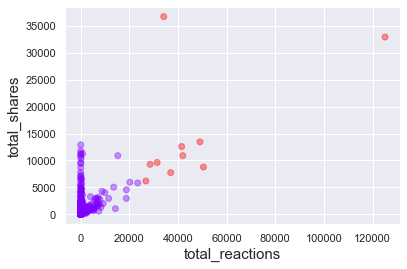

In [38]:
plt.scatter(x['total_reactions'],x['total_shares'],cmap='rainbow',c=x['clusters'],alpha=0.4)
plt.xlabel('total_reactions',fontsize=15)
plt.ylabel('total_shares',fontsize=15)


Text(0, 0.5, 'total_comments')

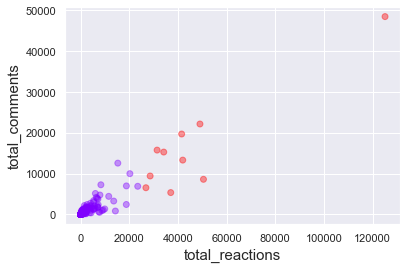

In [39]:
plt.scatter(x['total_reactions'],x['total_comments'],cmap='rainbow',c=x['clusters'],alpha=0.4)
plt.xlabel('total_reactions',fontsize=15)
plt.ylabel('total_comments',fontsize=15)

Text(0, 0.5, 'total_shares')

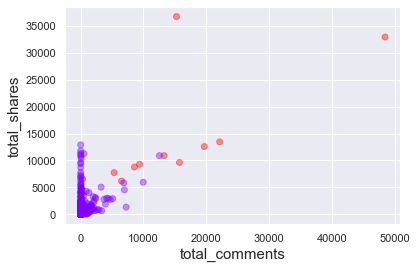

In [40]:
plt.scatter(x['total_comments'],x['total_shares'],cmap='rainbow',c=x['clusters'],alpha=0.4)
plt.xlabel('total_comments',fontsize=15)
plt.ylabel('total_shares',fontsize=15)

In [41]:
# Not top data
y = not_top.iloc[:,1:]
y

,total_reactions,total_comments,total_shares,total_plugin_comments
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,622.0,147.0,149.0,0.0
4,0.0,0.0,2.0,0.0
...,...,...,...,...
10431,0.0,0.0,738.0,0.0
10433,2.0,2.0,5.0,0.0
10434,0.0,0.0,47.0,0.0
10435,0.0,0.0,10.0,0.0


In [93]:
kmeans = KMeans(3).fit(y)
y_clusters = kmeans.fit_predict(y)
y['clusters']=y_clusters
y.head()

,total_reactions,total_comments,total_shares,total_plugin_comments,clusters
0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0
3,622.0,147.0,149.0,0.0,0
4,0.0,0.0,2.0,0.0,0


Text(0, 0.5, 'total_shares')

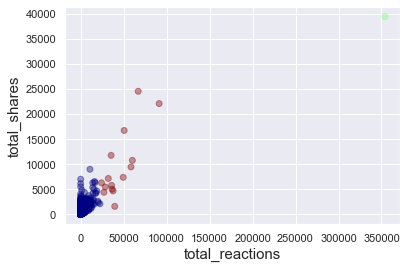

In [94]:
plt.scatter(y['total_reactions'],y['total_shares'],cmap='jet',c=y['clusters'],alpha=0.4)
plt.xlabel('total_reactions',fontsize=15)
plt.ylabel('total_shares',fontsize=15)